<a href="https://colab.research.google.com/github/sathwikap03/Sathwika/blob/main/Heart_health_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('/content/heart.csv')

In [4]:
# Data Cleaning & Preprocessing
# 1. Check missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [5]:
# 2. Data types
print("\nData types:\n", data.dtypes)


Data types:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [7]:

# 3. Outlier detection (basic example using z-score)
from scipy import stats
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
print("\nOutliers detected (Z-score > 3):", (z_scores > 3).sum().sum())


Outliers detected (Z-score > 3): 56


In [8]:

# 4. Normalization (Min-Max Scaling for clinical features)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
clinical_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']
data_scaled = data.copy()
data_scaled[clinical_cols] = scaler.fit_transform(data[clinical_cols])

In [9]:
# Exploratory Questions
# 1. Average age
avg_age = data['age'].mean()
print("\nAverage Age:", avg_age)


Average Age: 54.43414634146342


In [10]:
# 2. Gender distribution
gender_dist = data['sex'].value_counts()
print("\nGender Distribution:\n", gender_dist)


Gender Distribution:
 sex
1    713
0    312
Name: count, dtype: int64


In [11]:
# 3. Average resting blood pressure
avg_bp = data['trestbps'].mean()
print("\nAverage Resting BP:", avg_bp)


Average Resting BP: 131.61170731707318


In [12]:
# 4. Patients with fasting blood sugar > 120
high_fbs = data['fbs'].sum()
print("\nPatients with high FBS (>120):", high_fbs)


Patients with high FBS (>120): 153


In [13]:
# 5. Types of chest pain
cp_types = data['cp'].unique()
print("\nChest Pain Types:", cp_types)


Chest Pain Types: [0 1 2 3]


In [14]:
# 6. Max heart rate
max_hr = data['thalach'].max()
print("\nMax Heart Rate:", max_hr)


Max Heart Rate: 202


In [15]:
# 7. % of patients with exercise-induced angina
exang_pct = data['exang'].mean() * 100
print("\n% with Exercise-induced Angina:", exang_pct)


% with Exercise-induced Angina: 33.65853658536586


In [16]:
# 8. Average cholesterol
avg_chol = data['chol'].mean()
print("\nAverage Cholesterol:", avg_chol)


Average Cholesterol: 246.0


In [17]:
# 9. Count of patients with restecg = 2
ecg_count = (data['restecg'] == 2).sum()
print("\nPatients with restecg = 2:", ecg_count)


Patients with restecg = 2: 15


In [18]:
# 10. Distribution of 'ca'
ca_dist = data['ca'].value_counts()
print("\nDistribution of 'ca':\n", ca_dist)


Distribution of 'ca':
 ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [20]:
# 1. Correlation between age and cholesterol
corr_age_chol = data[['age', 'chol']].corr()
print("\nCorrelation between Age and Cholesterol:\n", corr_age_chol)


Correlation between Age and Cholesterol:
            age      chol
age   1.000000  0.219823
chol  0.219823  1.000000


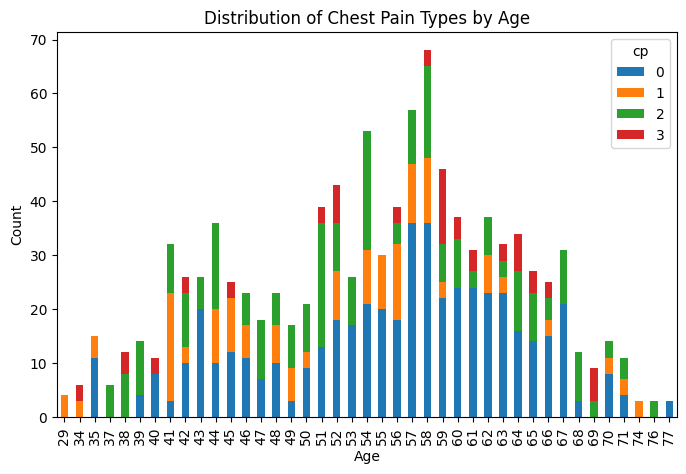

In [21]:
# 2. Distribution of chest pain types across different age groups
data.groupby('age')['cp'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Distribution of Chest Pain Types by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [22]:
# 3. Max heart rate vs exercise-induced angina
thalach_exang = data.groupby('exang')['thalach'].mean()
print("\nMax Heart Rate by Exercise-induced Angina:\n", thalach_exang)


Max Heart Rate by Exercise-induced Angina:
 exang
0    155.342647
1    136.837681
Name: thalach, dtype: float64


In [23]:
# 4. Resting BP difference between male and female
bp_by_sex = data.groupby('sex')['trestbps'].mean()
print("\nAverage Resting BP by Gender:\n", bp_by_sex)


Average Resting BP by Gender:
 sex
0    133.701923
1    130.697055
Name: trestbps, dtype: float64


In [24]:
# 5. Statistical test (t-test) for BP between genders
male_bp = data[data['sex'] == 1]['trestbps']
female_bp = data[data['sex'] == 0]['trestbps']
if len(male_bp) > 0 and len(female_bp) > 0:  # check if both genders exist
    t_stat, p_val = ttest_ind(male_bp, female_bp, equal_var=False)
    print("\nT-test for BP between Male & Female: t =", t_stat, ", p =", p_val)


T-test for BP between Male & Female: t = -2.368809107484408 , p = 0.018215824498594897


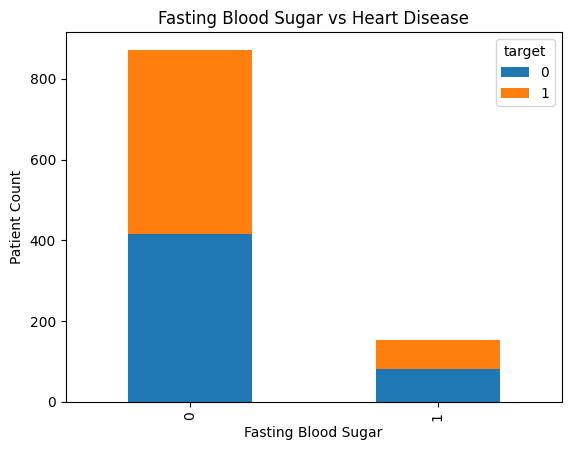

In [25]:
# 6. Fasting blood sugar vs heart disease
pd.crosstab(data['fbs'], data['target']).plot(kind='bar', stacked=True)
plt.title("Fasting Blood Sugar vs Heart Disease")
plt.xlabel("Fasting Blood Sugar")
plt.ylabel("Patient Count")
plt.show()

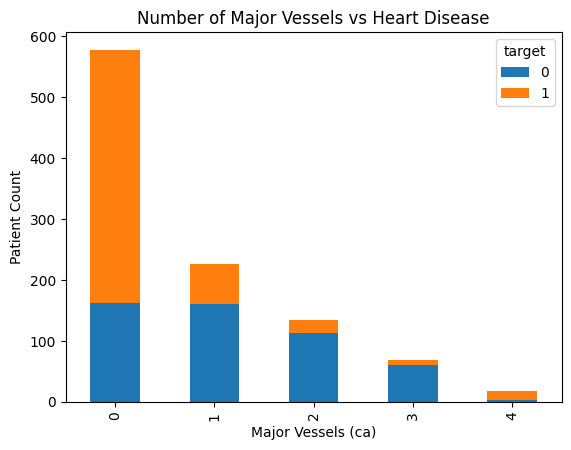

In [26]:
# 7. Major vessels vs target
pd.crosstab(data['ca'], data['target']).plot(kind='bar', stacked=True)
plt.title("Number of Major Vessels vs Heart Disease")
plt.xlabel("Major Vessels (ca)")
plt.ylabel("Patient Count")
plt.show()

In [27]:
# 8. Average oldpeak by chest pain type
oldpeak_cp = data.groupby('cp')['oldpeak'].mean()
print("\nAverage Oldpeak by Chest Pain Type:\n", oldpeak_cp)


Average Oldpeak by Chest Pain Type:
 cp
0    1.438833
1    0.323952
2    0.784507
3    1.380519
Name: oldpeak, dtype: float64


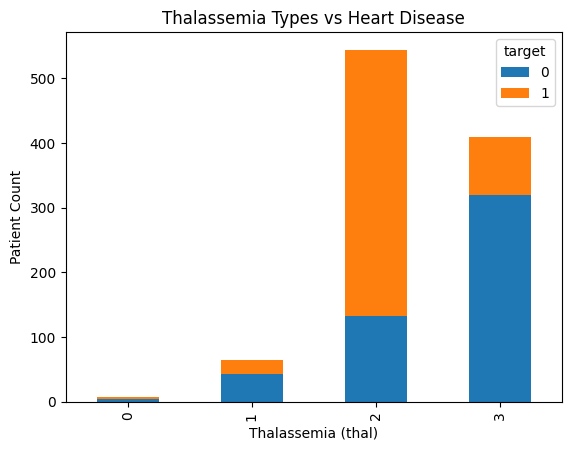

In [28]:
# 9. Thalassemia distribution among patients with/without heart disease
pd.crosstab(data['thal'], data['target']).plot(kind='bar', stacked=True)
plt.title("Thalassemia Types vs Heart Disease")
plt.xlabel("Thalassemia (thal)")
plt.ylabel("Patient Count")
plt.show()

In [29]:
# 10. Common risk factor combinations in heart disease patients
risk_combos = (
    data[data['target'] == 1]
    .groupby(['cp', 'fbs', 'exang', 'thal'])
    .size()
    .reset_index(name='counts')
    .sort_values(by='counts', ascending=False)
)
print("\nMost Common Risk Factor Combinations:\n", risk_combos)

# Pairwise comparison of patients with vs without heart disease
print("\nPatients WITH Heart Disease:\n", data[data['target'] == 1].describe())
print("\nPatients WITHOUT Heart Disease:\n", data[data['target'] == 0].describe())


Most Common Risk Factor Combinations:
     cp  fbs  exang  thal  counts
15   2    0      0     2     133
8    1    0      0     2      97
1    0    0      0     2      73
19   2    1      0     2      32
16   2    0      0     3      19
4    0    0      1     2      18
23   3    0      0     2      16
9    1    0      0     3      15
17   2    0      1     2      13
24   3    0      0     3      10
5    0    0      1     3       9
20   2    1      0     3       9
2    0    0      0     3       9
0    0    0      0     1       7
18   2    0      1     3       7
25   3    0      1     2       6
11   1    1      0     2       6
28   3    1      0     2       6
10   1    0      1     2       6
7    1    0      0     1       4
22   3    0      0     1       4
3    0    0      1     1       3
13   1    1      1     2       3
12   1    1      0     3       3
6    0    1      0     3       3
14   2    0      0     0       3
21   2    1      1     2       3
26   3    0      1     3       3
27 

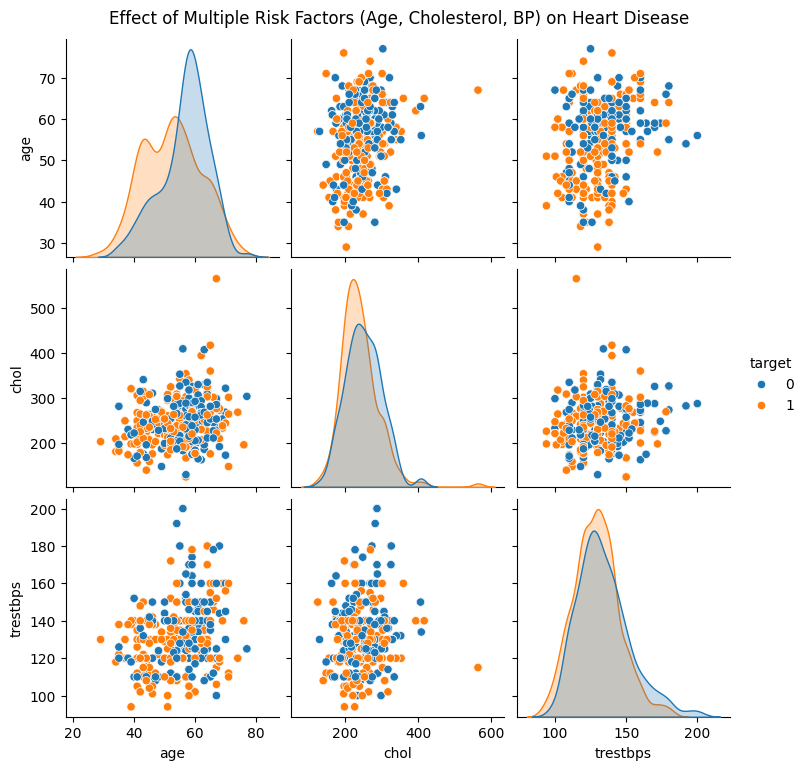

In [30]:
# 1. Effect of multiple risk factors
sns.pairplot(data, hue='target', vars=['age', 'chol', 'trestbps'])
plt.suptitle("Effect of Multiple Risk Factors (Age, Cholesterol, BP) on Heart Disease", y=1.02)
plt.show()

In [31]:
# 2. Strongest correlation with heart disease
corr_target = data.corr()['target'].sort_values(ascending=False)
print("\nCorrelation with Heart Disease:\n", corr_target)


Correlation with Heart Disease:
 target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


In [33]:
# 3. Logistic Regression for prediction
X = data.drop(columns=['target'])
y = data['target']
print("\nLogistic Regression Results:\n", X, y)


Logistic Regression Results:
       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     

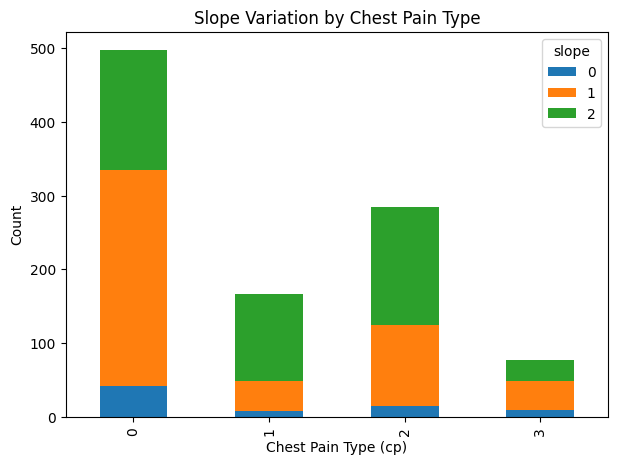

In [34]:
# 4. Variation of slope with chest pain types
data.groupby('cp')['slope'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(7,5))
plt.title("Slope Variation by Chest Pain Type")
plt.xlabel("Chest Pain Type (cp)")
plt.ylabel("Count")
plt.show()

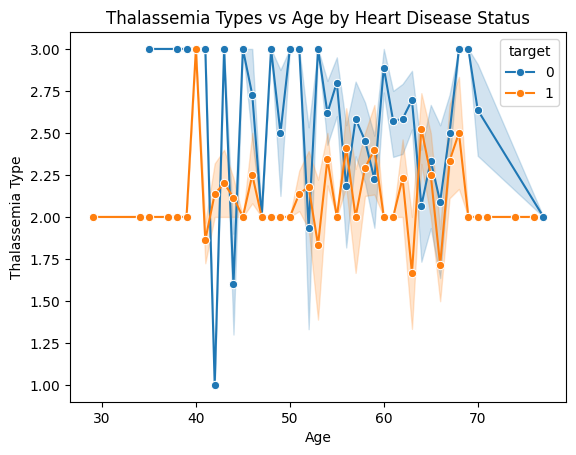

In [35]:
# 5. Thalassemia and survival (age as proxy)
# -------------------------------
sns.lineplot(x='age', y='thal', hue='target', data=data, marker="o")
plt.title("Thalassemia Types vs Age by Heart Disease Status")
plt.xlabel("Age")
plt.ylabel("Thalassemia Type")
plt.show()

In [36]:
from google.colab import files

# Save DataFrame to CSV
data.to_csv("cleaned_heart_health_analysis_data.csv", index=False)

In [37]:
files.download("cleaned_heart_health_analysis_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>